In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import json
import pickle
from matplotlib.patches import Ellipse
from graphviz import Digraph

In [2]:
y_size=1000
x_size=1400

In [3]:
def VisHMM(means,covars,transmat,start_p,ax=0,showim=1,stim=0,lengths=0,incol=False):
    '''
     visualize fixations and fitted hidden markov model
    hmmfitted: fitted hidden markov model
    ax: if not provided, new figure opens 

    
     Positional arguments
     ----------
    dat : sequence of fixations
    hmmfitted : fitted hmmlearn hidden markov model object

    
     Optional arguments
     ----------
    ax:  provide axis handle for the plot, if not new figure is opened The default is 0.
    showim : show stimulus if True The default is 1.
    stim : stimulus name
    lengths : length of time series sequences (needed for multiple sequences)
    incol : If True, use sequence of colorsm differing for each component. The default is False.

    Returns
    -------
    None.

    '''
    
    colors=['k','gray','salmon','olive','m','c','g','y','navy','orange','darkred','r','darkgreen','k','gray','salmon','olive','y','m','g','c']
    if type(ax)==int:
        fig,ax= plt.subplots()
  
    ax.scatter(means[:,0],means[:,1],color='darkred',s=50)
    
    for c1 in range(np.shape(means)[0]):
        if incol:
            color1=colors[c1]  # color for scatter 
            color2=colors[c1] # color for patch

        else:
            color1='k'
            color2='olive'

        #print(np.shape(hmmfitted.covars_[c1]))
       # draw_ellipse((hmmfitted.means_[c1,0],hmmfitted.means_[c1,1]),hmmfitted.covars_[c1],ax=ax,facecolor='none',edgecolor=color2,linewidth=2)
        draw_ellipse(means[c1,0],means[c1,1],covars[c1],ax=ax,facecolor='none',edgecolor=color2,linewidth=2)
        
        if start_p[c1]>.05 and means[c1,1]>0:
            ax.text(means[c1,0],means[c1,1],int(np.round(start_p[c1]*100)),color='gold')
        for c2 in range(np.shape(means)[0]):
            if c1!=c2:
                ax.plot([means[c1,0],means[c2,0]],[means[c1,1],means[c2,1]],linewidth=transmat[c1,c2]*2,color='r')
    ax.set_ylim([y_size,0])
    ax.set_xlim([0,x_size])
   # ax.set_yticks([])
   # ax.set_xticks([])   


In [4]:


def draw_ellipse(posx,posy, covariance, ax=None, facecolor='none',edgecolor='red',linewidth=2):
    """Draw an ellipse with a given position and covariance
    source:
    https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html """
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 2):
        ax.add_patch(Ellipse(np.array([posx,posy]), nsig * width, nsig * height,
                             angle=angle,facecolor=facecolor,edgecolor=edgecolor,linewidth=linewidth))
        


                

In [79]:
def GetDat(group, stim):
    fold = 4
    dir = "./hmm_models/models_g"+group+"/models_g"+group+"_fold_"+str(fold)+"_stim_"+str(stim)+".pkl"
    with open(dir, 'rb') as f:
        data = pickle.load(f)
        mean=data.means_
        covar=data.covars_
        transmat=data.transmat_
        start_p=data.startprob_
    return mean,covar,transmat,start_p

In [80]:
stimuli=np.arange(1,31)

entropy_start=np.zeros((len(stimuli),2))
entropy_trans=np.zeros((len(stimuli),2))


In [81]:
for cs,s in enumerate(stimuli):
    for gr in range(2):
        mean,covar,transmat,start_p=GetDat(str(gr),s)
        entropy_start[cs,gr]=stats.entropy(start_p)
        entropy_trans[cs,gr]=np.nanmean(stats.entropy(transmat))

In [82]:
mean

array([[ 446.5023705 ,  502.75462277],
       [ 778.03080173,  503.4483167 ],
       [ 231.01401038,  489.19927641],
       [ 928.21423837,  502.2195831 ],
       [1144.15306122,  878.32857143],
       [ 622.22051098,  504.14981911],
       [1031.56766098,  507.14263122],
       [ 192.75758541,  508.50639515]])

In [83]:
entropy_trans

array([[0.64387666, 0.723179  ],
       [0.76522122, 0.50968869],
       [0.72139543, 0.68558357],
       [0.7160598 , 0.70945294],
       [0.77384019, 0.7397817 ],
       [0.79891805, 0.69901837],
       [0.70985403, 0.73821182],
       [0.86766523, 0.76639212],
       [0.75784623, 0.66699183],
       [0.7318826 , 0.60718409],
       [0.70011833, 0.832438  ],
       [0.59235085, 0.64118713],
       [0.68313594, 0.68976189],
       [0.73044003, 0.47968177],
       [0.65150666, 0.80398756],
       [0.69983601, 0.71336383],
       [0.68359349, 0.68521554],
       [0.56509122, 0.63718742],
       [0.66263887, 0.71522733],
       [0.71568296, 0.60510597],
       [0.72217545, 0.78200104],
       [0.7260791 , 0.6217674 ],
       [0.70742169, 0.7076012 ],
       [0.77184464, 0.61357145],
       [0.67496827, 0.79940022],
       [0.66379606, 0.74035979],
       [0.7530884 , 0.70360413],
       [0.85856269, 0.69158518],
       [0.70212663, 0.75627582],
       [0.63525424, 0.66909262]])

In [84]:
np.mean(entropy_start,0)

array([0.72320156, 0.92715564])

In [85]:
np.mean(entropy_trans,0)

array([0.7128757 , 0.69112998])

In [90]:
print("Statistical comparison between groups:")
print("Start Entropy: ", stats.ttest_rel(entropy_start[:,0],entropy_start[:,1]))
print("Transition Entropy: ", stats.ttest_rel(entropy_trans[:,0],entropy_trans[:,1]))

Statistical comparison between groups:
Start Entropy:  TtestResult(statistic=-2.6506492617908948, pvalue=0.012877965835116528, df=29)
Transition Entropy:  TtestResult(statistic=1.1226222082563106, pvalue=0.27080671776329857, df=29)


In [91]:
GRM=pd.read_csv("C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/merged.csv")

C:\Users\Utente\AppData\Local\Temp\ipykernel_7236\888458120.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  GRM=pd.read_csv("C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/merged.csv")


In [92]:
list(GRM)

['subject',
 'stimulus',
 'start_time',
 'end_time',
 'duration_ms',
 'fix_x',
 'fix_y',
 'practice',
 'repetition',
 'record_number',
 'Group',
 'GroupName']

In [93]:
GRM.subject.unique()

array(['P212', 'P215', 'P221', 'P225', 'P247', 'P270', 'P275', 'P294',
       'P106', 'P112', 'P113', 'P121', 'P141', 'P153', 'P154', 'P16',
       'P32', 'P37', 'P54', 'P84', 'P86', 'P88', 'P98', 'P99', '21498',
       '21513', '21629', '21636', '21667', '21706', '21862', '21939',
       '22129', '22138', '22219', '22239', '22322', '22327', '22341',
       '22394', '22468', '22472', '22551', '22552', '22557', '22565',
       '22618', '22640', '22712', '22779', '22828', '22874', '22923',
       '22925', '22952', '22958', 'P231', 'P252', 'P258', 'P263', 'P268',
       'P102', 'P110', 'P114', 'P138', 'P139', 'P158', 'P187', 'P190',
       'P194', 'P202', 'P208', 'P36', 'P41', 'P85', 'P90', 'P94', '21418',
       '21469', '21526', '21630', '21658', '21683', '21699', '21811',
       '21819', '21889', '21927', '21946', '22168', '22181', '22204',
       '22234', '22279', '22291', '22378', '22464', '22508', '22667',
       '22691', '22692', '22729', '22783', '22818', '22900', '22929',
       

In [94]:
GrazDat=GRM.loc[GRM.subject.str.contains("P")==True,:]
GrazDat=GrazDat[GrazDat.Group.isna()==False].reset_index()

In [95]:
MunichDat=GRM.loc[GRM.subject.str.contains("P")==False,:].reset_index()

In [96]:
GrazDat["dyslexia"]=0
GrazDat.loc[GrazDat.Group<3,"dyslexia"]=1
MunichDat["dyslexia"]=0
MunichDat.loc[MunichDat.Group<3,"dyslexia"]=1

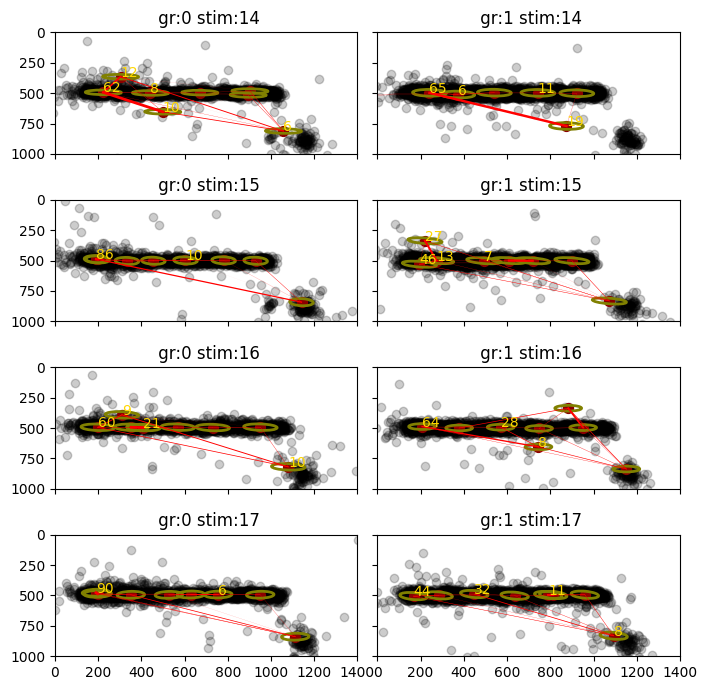

In [97]:
stimid=np.arange(14,18)
fig,ax=plt.subplots(ncols=2,nrows=4,sharex=True,sharey=True,figsize=(7,7))
#ax=ax.flatten()
for cs,s in enumerate(stimid):
    for gr in range(2):
        
        dIdx=(MunichDat.stimulus==s) & (MunichDat.dyslexia==gr)
        x,y=MunichDat.fix_x[dIdx],MunichDat.fix_y[dIdx]
        mean,covar,transmat,start_p=GetDat(str(gr),s)
        ax[cs,gr].scatter(x,y,color='k',alpha=.2)
        VisHMM(mean,covar,transmat,start_p,ax=ax[cs,gr])
        ax[cs,gr].set_title(' gr:'+str(gr)+' stim:'+str(s))
plt.tight_layout()

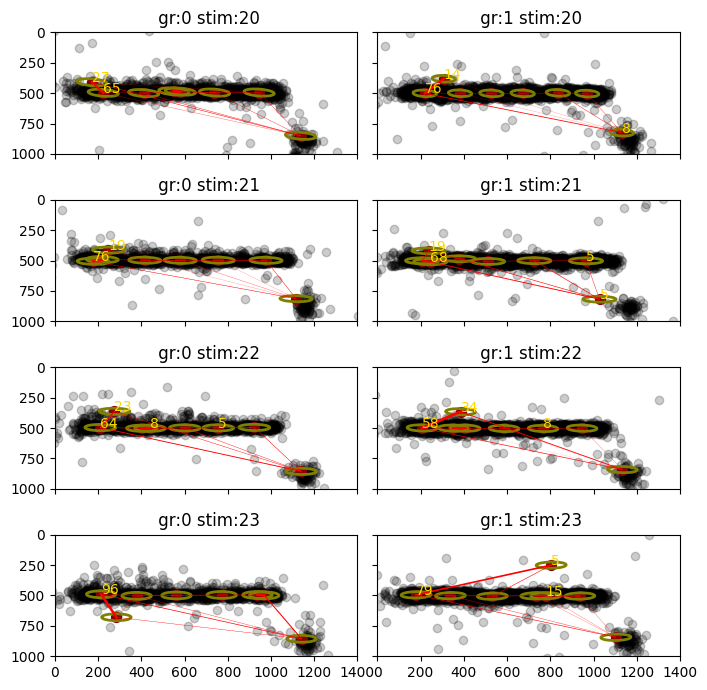

In [98]:
stimid=np.arange(20,24)
fig,ax=plt.subplots(ncols=2,nrows=4,sharex=True,sharey=True,figsize=(7,7))
#ax=ax.flatten()
for cs,s in enumerate(stimid):
    for gr in range(2):

        dIdx=(MunichDat.stimulus==s) & (MunichDat.dyslexia==gr)
        x,y=MunichDat.fix_x[dIdx],MunichDat.fix_y[dIdx]
        mean,covar,transmat,start_p=GetDat(str(gr),s)
        ax[cs,gr].scatter(x,y,color='k',alpha=.2)
        VisHMM(mean,covar,transmat,start_p,ax=ax[cs,gr])
        ax[cs,gr].set_title(' gr:'+str(gr)+' stim:'+str(s))
plt.tight_layout()